In [2]:
import pandas as pd

benchmark_data = pd.read_csv('benchmark_results/DecisionTreeClassifier-benchmarks.tsv.gz', sep='\t')
benchmark_data.head()

,dataset,model,parameters,testing_score
0,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.814385
1,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.781903
2,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.781903
3,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.846868
4,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.807425


In [2]:
benchmark_data.describe()

,testing_score
count,360.000000
mean,0.728313
std,0.227737
min,0.222738
25%,0.795244
50%,0.819026
75%,0.844548
max,0.883991


''

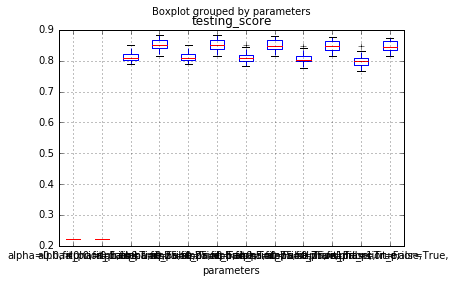

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

benchmark_data.boxplot('testing_score', by='parameters')
;

# MultinomialNB results

Good alpha range is [0.1, 1.0]; looks like alpha doesn't affect performance much within that range

fit_prior = True always performs better

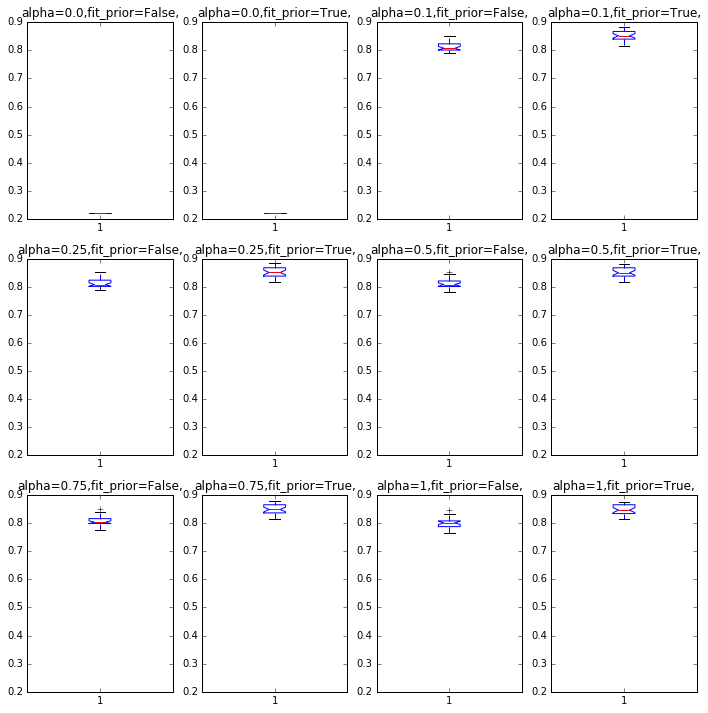

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for (index, (parameter, parameter_group)) in enumerate(benchmark_data.groupby('parameters')):
    plt.subplot(3, 4, index + 1)
    plt.title(parameter)
    plt.boxplot(parameter_group['testing_score'].values, notch=True)
    plt.ylim(0.2, 0.9)

In [7]:
benchmark_data.head()

,dataset,model,parameters,testing_score
0,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.814385
1,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.781903
2,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.781903
3,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.846868
4,car-evaluation,MultinomialNB,"alpha=1,fit_prior=False,",0.807425


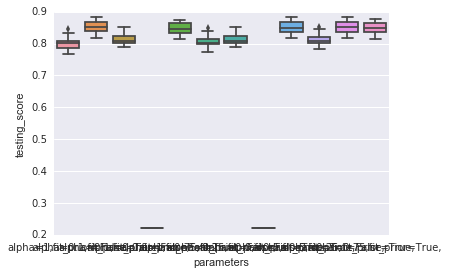

In [9]:
%matplotlib inline
import seaborn as sb

sb.boxplot(data=benchmark_data, x='parameters', y='testing_score')

In [3]:
ghvhg=benchmark_data['parameters'].apply(lambda x: x.split(','))


In [4]:
print (ghvhg)


0        [alpha=1, fit_prior=False, ]
1        [alpha=1, fit_prior=False, ]
2        [alpha=1, fit_prior=False, ]
3        [alpha=1, fit_prior=False, ]
4        [alpha=1, fit_prior=False, ]
5        [alpha=1, fit_prior=False, ]
6        [alpha=1, fit_prior=False, ]
7        [alpha=1, fit_prior=False, ]
8        [alpha=1, fit_prior=False, ]
9        [alpha=1, fit_prior=False, ]
10       [alpha=1, fit_prior=False, ]
11       [alpha=1, fit_prior=False, ]
12       [alpha=1, fit_prior=False, ]
13       [alpha=1, fit_prior=False, ]
14       [alpha=1, fit_prior=False, ]
15       [alpha=1, fit_prior=False, ]
16       [alpha=1, fit_prior=False, ]
17       [alpha=1, fit_prior=False, ]
18       [alpha=1, fit_prior=False, ]
19       [alpha=1, fit_prior=False, ]
20       [alpha=1, fit_prior=False, ]
21       [alpha=1, fit_prior=False, ]
22       [alpha=1, fit_prior=False, ]
23       [alpha=1, fit_prior=False, ]
24       [alpha=1, fit_prior=False, ]
25       [alpha=1, fit_prior=False, ]
26       [al

In [5]:
ghvhg.head()

0    [alpha=1, fit_prior=False, ]
1    [alpha=1, fit_prior=False, ]
2    [alpha=1, fit_prior=False, ]
3    [alpha=1, fit_prior=False, ]
4    [alpha=1, fit_prior=False, ]
Name: parameters, dtype: object

In [3]:
# MapReduce Example

from mrjob.job import MRJob

class MoviesByUserCounter(MRJob):
    def mapper(self, key, line):
        (userID, movieID, rating, timestamp)=line.split('\t')
        yield userID, movieID
        
    def reducer(self, user, movies):
        numMovies=0
        for movies in movies:
            numMovies=numMovies+1
            
        yield user, numMovies
        
if __name__=='__main__':
    MoviesByUserCounter.run()

ImportError: No module named 'mrjob'